In [1]:
# Liquor Sales : 
#    file: https://mydata.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy
# US County Boundaries & FIP Codes
#    file: https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_20m.zip
# Counties Population
#    file: https://data.iowa.gov/Community-Demographics/County-Population-in-Iowa-by-Year/qtnr-zsrc
# Cities in IOWA population
#    file: https://data.iowa.gov/Community-Demographics/Total-City-Population-by-Year/acem-thbp

In [2]:
import pandas as pd
import folium
import warnings
import geopandas
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
file = 'Iowa_Liquor_Sales.csv'
df = pd.read_csv(file, header=0)

In [4]:
df.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number               object
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [5]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [6]:
df[['dummy','Lat', 'Lon']]= df['Store Location'].str.split(" ", n=-1, expand=True)

In [7]:
df['Lat'] = df['Lat'].str.replace('(', '')
df['Lon'] = df['Lon'].str.replace(')', '')

In [8]:
a = df['Store Location'].unique()
print( 'there are', len(a), 'stores')

there are 2174 stores


In [9]:
# to make the problem easier for the laptops we use only data from 2015
df['Date'] = pd.to_datetime(df['Date'])
df_2015 = df[df['Date'].dt.year == 2015]

In [10]:
df_2015.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'dummy', 'Lat', 'Lon'],
      dtype='object')

In [11]:
# we twist here and there to obtain list of stores and location
stores_df = df.pivot_table(index=['Store Name', "Store Location", "County Number"])
cols = stores_df.columns
stores_df = stores_df.reset_index()
stores_df = stores_df.drop(cols, axis=1)

In [12]:
# Clean point format
stores_df[['dummy','Lat', 'Lon']]= stores_df['Store Location'].str.split(" ", n=-1, expand=True)
stores_df['Lat'] = stores_df['Lat'].str.replace('(', '')
stores_df['Lon'] = stores_df['Lon'].str.replace(')', '')
stores_df = stores_df.drop('dummy', axis=1)

In [13]:
stores_df

Store Name  \
0           "Double ""D"" Liquor Store"   
1            'Da Booze Barn / West Bend   
2            'Da Booze Barn / West Bend   
3     10th Hole Inn & Suite / Gift Shop   
4            16th Ave BP / Cedar Rapids   
...                                 ...   
2824                             goPuff   
2825                      goPuff / Ames   
2826                 goPuff / Iowa City   
2827             goPuff / North Liberty   
2828           k food mart / Monticello   

                             Store Location  County Number         Lat  \
0              POINT (-91.473634 43.262114)            3.0  -91.473634   
1     POINT (-73.982421 40.305231000000006)           74.0  -73.982421   
2              POINT (-94.445143 42.959247)           74.0  -94.445143   
3               POINT (-92.547769 43.36388)           45.0  -92.547769   
4              POINT (-91.667665 41.961645)           57.0  -91.667665   
...                                     ...            ...         ...   
2824           POINT (-91.534512 41.641762)           52.0  -91.534512   
2825           POINT (-93.581305 42.016041)           85.0  -93.581305   
2826           POINT (-91.534512 41.641762)           52.0  -91.534512   
2827           POINT (-91.606306 41.751471)           52.0  -91.606306   
2828           POINT (-91.185929 42.232914)           53.0  -91.185929   

                     Lon  
0              43.262114  
1     40.305231000000006  
2              42.959247  
3               43.36388  
4              41.961645  
...                  ...  
2824           41.641762  
2825           42.016041  
2826           41.641762  
2827           41.751471  
2828           42.232914  

[2829 rows x 5 columns]

In [63]:
# A simple folium visualization
# center of IOWA 93.0977 41.8780
i_size = (1,1)
#icon = folium.features.CustomIcon(icon_url,icon_size=isize)
# icons are in fontwawesome.com v4.7
from folium.plugins import BeautifyIcon

map1 = folium.Map(
    location=[41.8780,-93.0977],
    tiles='OpenStreetMap',
    zoom_start=7,
    color='red'
)

# circle marker
circle_green = BeautifyIcon(
    icon_shape='circle-dot', 
    border_color='blue', 
    border_width=3
)
#folium.Marker([-20, 25], tooltip='circle', icon=icon_circle).add_to(m)

stores_df.apply(lambda row:folium.Marker(location=[row["Lon"], row["Lat"]], popup=row['Store Name'],     
              icon=BeautifyIcon(icon_shape='circle-dot', border_color='red',
              fill_opacity=0.4)).add_to(map1), axis=1)
#             icon=folium.Icon(icon='shopping-cart', color='red', prefix='fa'), icon_size=i_size).add_to(map1), axis=1)
map1
#map1.save('test.html')
# what should we do with the 3 outliers?

In [15]:
# Let's do a map of counties 'counting' the shops in that county
# see https://georgetsilva.github.io/posts/mapping-points-with-folium/
# Loading counties geogrpahical information


In [16]:
geo_county=geopandas.read_file('cb_2018_us_county_20m.shp')
# IOWA is state n=19
geo_counties_IOWA = geo_county[geo_county['STATEFP']=='19']

In [17]:
# generate dataframe counting shops per county
# first we delete duplicates of shop names in dataframe
df_2015 = df_2015.drop_duplicates(subset=['Store Name'], keep='first', inplace=False)
# Now we count the number of stores per county << madre del cordero >>
df_2015.groupby('County')['Store Name'].count()

County
Adair          8
Adams          1
Allamakee      6
Appanoose      6
Audubon        3
              ..
Winnebago      7
Winneshiek     5
Woodbury      37
Worth          3
Wright        10
Name: Store Name, Length: 99, dtype: int64

In [18]:
counties = df_2015.groupby('County')['Store Name'].count().to_frame().reset_index()
counties

County  Store Name
0        Adair           8
1        Adams           1
2    Allamakee           6
3    Appanoose           6
4      Audubon           3
..         ...         ...
94   Winnebago           7
95  Winneshiek           5
96    Woodbury          37
97       Worth           3
98      Wright          10

[99 rows x 2 columns]

In [19]:
geo_counties_IOWA = geo_counties_IOWA.rename(columns={"NAME": "County"})
counties = counties.merge(geo_counties_IOWA, on='County')
counties = counties.rename(columns={"Store Name": "N stores"})
counties.head(3)

County  N stores STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID LSAD  \
0      Adair         8      19      001  00465190  0500000US19001  19001   06   
1      Adams         1      19      003  00465191  0500000US19003  19003   06   
2  Allamakee         6      19      005  00465192  0500000US19005  19005   06   

        ALAND    AWATER                                           geometry  
0  1474404193   2597996  POLYGON ((-94.70063 41.50415, -94.24159 41.503...  
1  1096686268   5367875  POLYGON ((-94.92759 41.15851, -94.70059 41.158...  
2  1655115645  51094070  POLYGON ((-91.61084 43.50069, -91.49104 43.500...

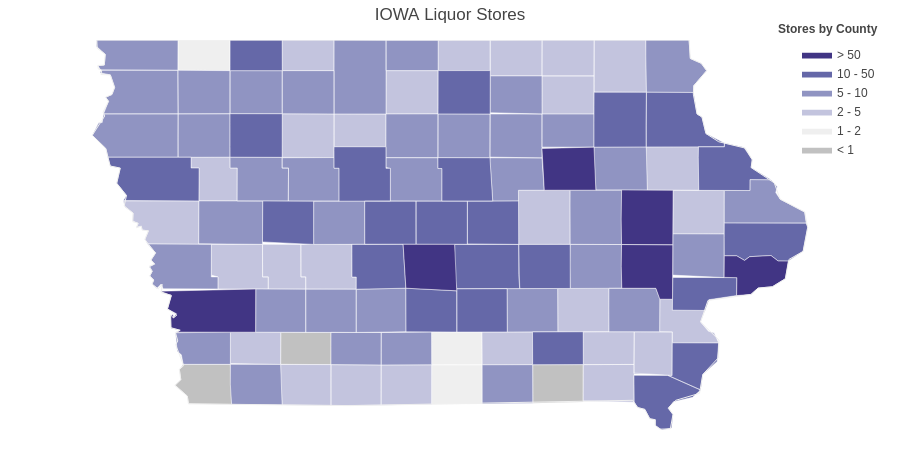

In [138]:
# Let's draw the figure
counties['total_fip'] = counties['STATEFP']+counties['COUNTYFP']
values = counties['N stores'].tolist()
fips   = counties['total_fip'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Iowa'],
    binning_endpoints=[1, 2, 5, 10, 50], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Stores by County', title='IOWA Liquor Stores'
)
fig.layout.template = None
fig.show('png')

In [139]:
# Figure of county population
file = 'County_Population_in_Iowa_by_Year.csv'
counties_population = pd.read_csv(file, header=0)

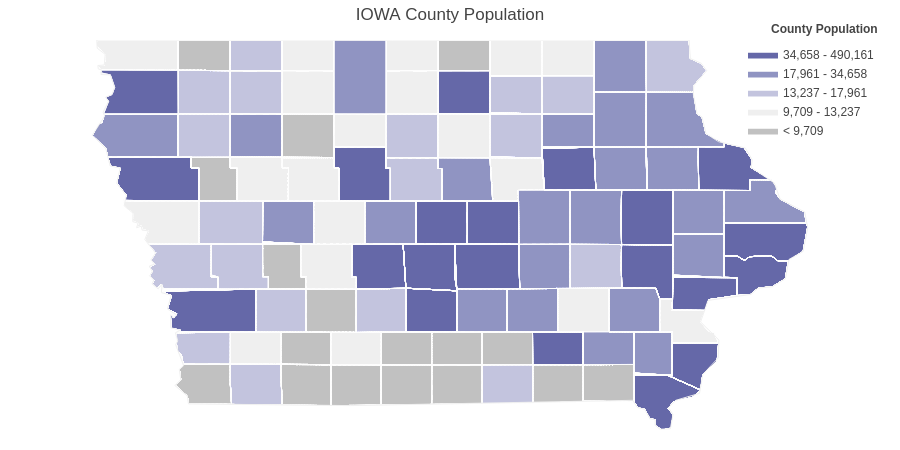

In [140]:
counties_population['Year'] = pd.to_datetime(counties_population['Year'])
cunties_population = counties_population[counties_population['Year'].dt.year == 2015]
values = counties_population['Population'].tolist()
fips   = counties_population['FIPS'].tolist()

#Calculating Binning endpoints

quartiles= counties_population['Population'].quantile([0.20,0.4,0.6,0.8,1]).values.tolist()


fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Iowa'],
    binning_endpoints=quartiles, colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='County Population', title='IOWA County Population'
)
fig.layout.template = None
fig.show('png')

In [105]:
# Figure City Population IOWA
file = 'Total_City_Population_by_Year.csv'
cities_population = pd.read_csv(file, header=0)
cities_population['Year'] = pd.to_datetime(cities_population['Year'])
cities_population = cities_population[cities_population['Year'].dt.year == 2015]

In [106]:
# add lat lon cleaning POINT format
cities_population[['dummy','Lon', 'Lat']]= cities_population['Primary Point'].str.split(" ", n=-1, expand=True)
cities_population['Lon'] = cities_population['Lon'].str.replace('(', '')
cities_population['Lat'] = cities_population['Lat'].str.replace(')', '')
cities_population = cities_population.drop('dummy', axis=1)
cities_population = cities_population.sort_values(by='Population', ascending=True)

In [116]:
cities_population['text'] = cities_population['City'] + '<br>Population ' + \
                      (cities_population['Population']).astype(int).astype(str)
limits = [(0,200),(201,400),(501,600),(601,800),(801,943)]
colors = ["crimson","lightseagreen","orange","lightgrey","royalblue"]
cities = []
scale = 50

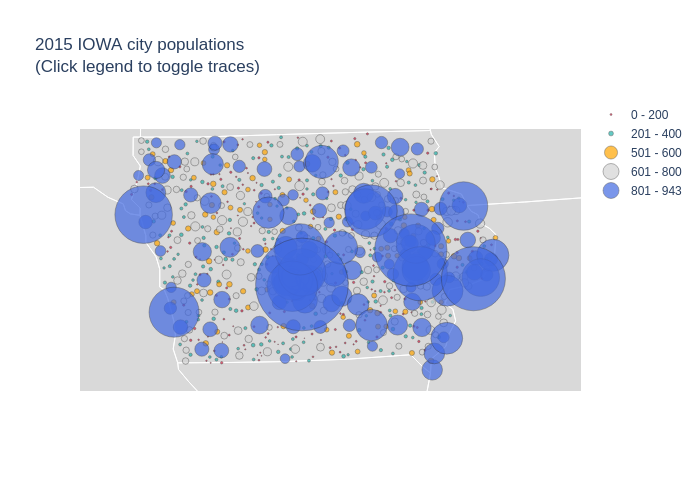

In [123]:
fig = go.Figure()


for i in range(len(limits)):
    lim = limits[i]
    df_sub = cities_population[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['Lon'],
        lat = df_sub['Lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Population']/scale,
            
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2015 IOWA city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
# focus point
lat_foc = 41.8780
lon_foc = -93.0977
fig.update_layout(
        geo = dict(
            projection_scale=8, #this is kind of like zoom
            center=dict(lat=lat_foc, lon=lon_foc), # this will center on the point
        ))
fig.show('png')# trick to freeze it in Notebook 